# **Preparación del entorno**

In [1]:
# Importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Importar librerias de modelado
from sklearn.model_selection import train_test_split
# Importar librerias de modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importar librerias de metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras 5 filas del dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Mostrar la informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Mostrar la cantidad de valores nulos en el dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Mostrar valores NaN
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Estadisticas del dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Eliminar columnas innecesarias
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Mostrar las primeras 5 filas del dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Tratamiento de los datos**

In [8]:
# Amputar los valores faltantes de la columna 'Age' por la media
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Verificar si aun existen valores faltantes
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
# Convertir la variable categórica 'Sex' en numérica
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Mostrar las primeras 5 filas del dataset para verificar la conversión
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [12]:
# Convertir la variable categórica 'Embarked' en numérica
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Mostrar las primeras 5 filas del dataset para verificar la conversión
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [14]:
# Amputar los valores faltantes de la columna 'Embarked' por la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verificar si aun existen valores faltantes
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# Seleccionar caracteristicas más importantes de manera automática
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('Survived', axis=1)
y = df['Survived']

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenar dos dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

      Specs        Score
5      Fare  4518.319091
1       Sex    92.702447
0    Pclass    30.873699
2       Age    24.687926
6  Embarked    11.353117
4     Parch    10.097499
3     SibSp     2.581865


In [27]:
# Importar la librería fm de matplotlib
from matplotlib import font_manager as fm

# Configurar el estilo de los gráficos con ggplot
plt.style.use('ggplot')

# Ruta a la fuente personalizada
font_path = 'KellySlab-Regular.ttf'  # Rura a la fuente personalizada

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

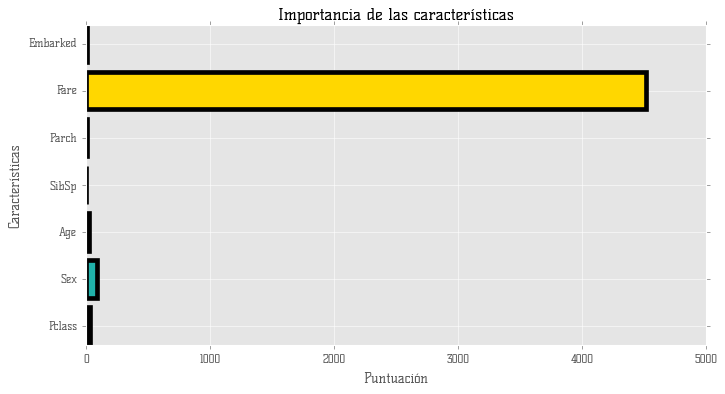

In [28]:
# Crear un gráfico de barras para visualizar las características más importantes
plt.figure(figsize=(10, 5))
plt.barh(featureScores['Specs'], featureScores['Score'], edgecolor='black', linewidth=4.2, color=['#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#FF69B4', '#FFD700', '#ADFF2F', '#FF6347', '#00FFFF', '#FF4500'])
plt.xlabel('Puntuación')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

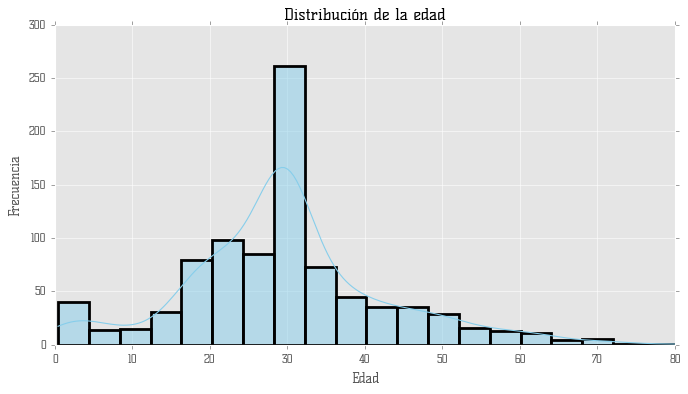

In [31]:
# Gráfico de histograma de la edad
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, color='skyblue', bins=20, edgecolor='black', linewidth=2.5)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [32]:
# Imprimir valor minimo y maximo de la edad, asi como el promedio
print('Edad mínima:', df['Age'].min())
print('Edad máxima:', df['Age'].max())
print('Edad promedio:', df['Age'].mean())

Edad mínima: 0.42
Edad máxima: 80.0
Edad promedio: 29.69911764705882


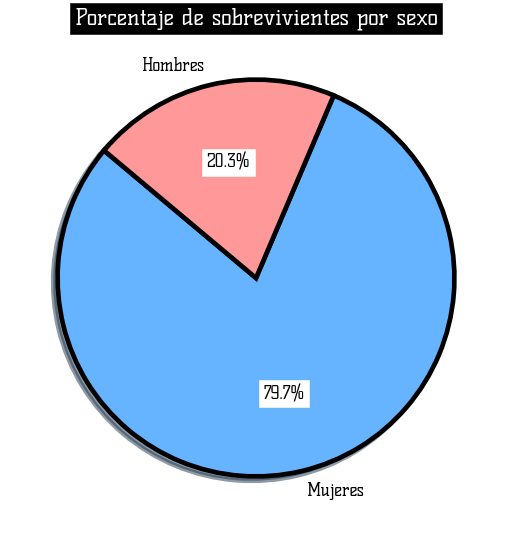

In [45]:
# Contar el número de sobrevivientes por sexo
# Calcular el número total de sobrevivientes por sexo
total_survivors_by_sex = df.groupby('Sex')['Survived'].sum()

# Calcular el número total de pasajeros por sexo
total_passengers_by_sex = df['Sex'].value_counts()

# Calcular el porcentaje de sobrevivientes por sexo
percentage_survivors_by_sex = (total_survivors_by_sex / total_passengers_by_sex) * 100

# Crear etiquetas para el gráfico
labels = ['Mujeres', 'Hombres']

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(percentage_survivors_by_sex, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'], shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2})
plt.title('Porcentaje de sobrevivientes por sexo', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.show()

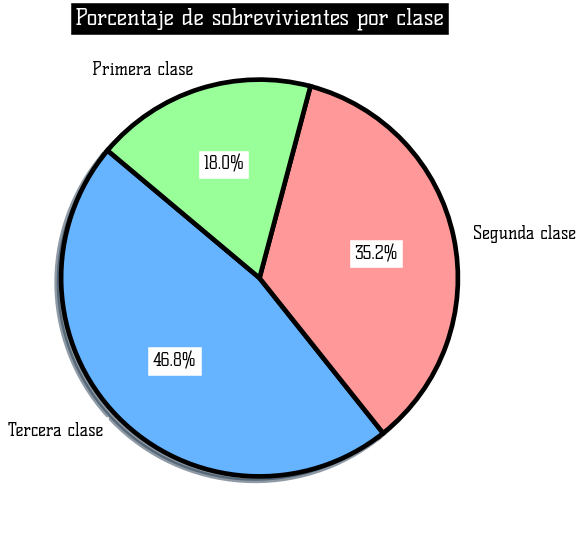

In [50]:
# Calcular el número total de sobrevivientes por clase
total_surivors_by_class = df.groupby('Pclass')['Survived'].sum()

# Calcular el número total de pasajeros por clase
total_passengers_by_class = df['Pclass'].value_counts()

# Calcular el porcentaje de sobrevivientes por clase
percentage_survivors_by_class = (total_surivors_by_class / total_passengers_by_class) * 100

# Utilizar etiquetas originales para el gráfico
labels = ['Tercera clase', 'Segunda clase', 'Primera clase']

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(percentage_survivors_by_class, labels=labels,autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'], shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2})
plt.title('Porcentaje de sobrevivientes por clase', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.show()

In [52]:
# Calcular el número total de sobrevivientes en todo el dataset
total_survivors = df['Survived'].sum()

# Calcular el número total de pasajeros en todo el dataset
total_passengers = df['Survived'].count()

# Imprimir el número total de sobrevivientes y pasajeros
print('Número total de sobrevivientes:', total_survivors)
print('Número total de pasajeros:', total_passengers)

Número total de sobrevivientes: 342
Número total de pasajeros: 891


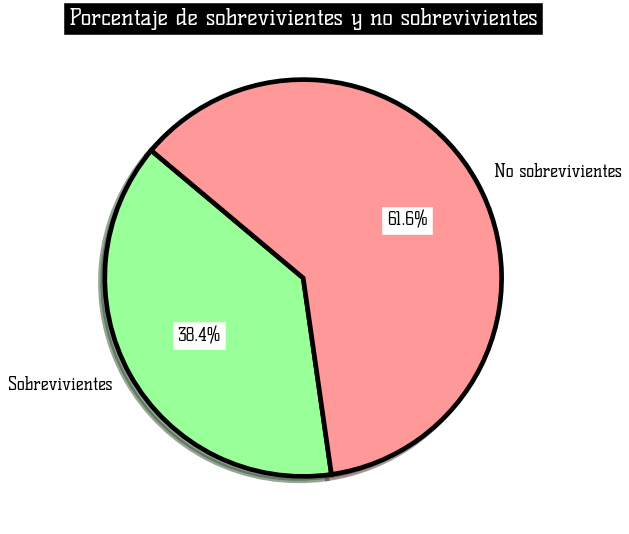

In [53]:
# Gráfico de los sobrevivientes y no sobrevivientes
plt.figure(figsize=(8, 8))
plt.pie([total_survivors, total_passengers - total_survivors], labels=['Sobrevivientes', 'No sobrevivientes'], autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ff9999'], shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2})
plt.title('Porcentaje de sobrevivientes y no sobrevivientes', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.show()

# **Modelado**

In [54]:
# Utilizar las caracteristicas seleccionadas de manera automática
# Seleccionar caracteristicas más importantes de manera automática
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('Survived', axis=1)
y = df['Survived']

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenar dos dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

      Specs        Score
5      Fare  4518.319091
1       Sex    92.702447
0    Pclass    30.873699
2       Age    24.687926
6  Embarked    11.353117
4     Parch    10.097499
3     SibSp     2.581865


In [55]:
# Seleccionar las caracteristicas más importantes
X = df[['Fare', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

# Normalizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [64]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crear un modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = logistic_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo de regresión logística:', accuracy)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo de regresión logística: 0.7927170868347339
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       216
           1       0.77      0.68      0.72       141

    accuracy                           0.79       357
   macro avg       0.79      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357



In [58]:
# Importar librerias para silenciar advertencias
import warnings
warnings.filterwarnings('ignore')

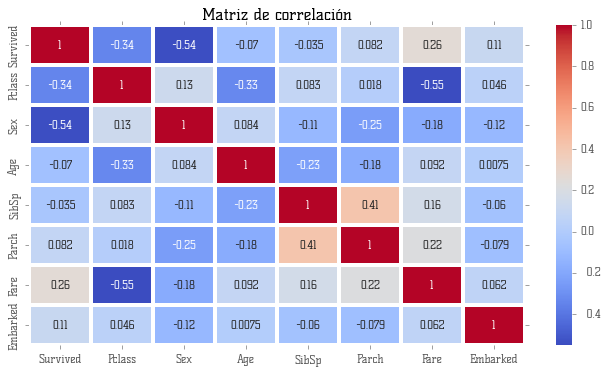

In [59]:
# Mostrar matriz de correlación de todo el dataset
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.title('Matriz de correlación')
plt.show()

In [60]:
# Entrenar un modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = decision_tree_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo de árbol de decisión:', accuracy)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo de árbol de decisión: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [73]:
# Entrenar un modelo de bosque aleatorio
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5)
random_forest_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = random_forest_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo de bosque aleatorio:', accuracy)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo de bosque aleatorio: 0.8207282913165266
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       216
           1       0.86      0.65      0.74       141

    accuracy                           0.82       357
   macro avg       0.83      0.79      0.80       357
weighted avg       0.83      0.82      0.81       357



In [74]:
# Ajustar hiperparámetros del modelo de bosque aleatorio
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False], 
    'random_state': [0, 50, 100]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación:', grid_search.best_score_)
print('Mejor estimador:', grid_search.best_estimator_)
print('Mejor índice:', grid_search.best_index_)
print('Mejor puntaje de validación cruzada:', grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=0; total time=   0.0s[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=0; total time=   0.0s

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=50; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=100, random_state=50; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5